In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

sns.set(context='notebook', style='white', font_scale=1.2)

In [2]:
try:
    import crossmapy as cmp
except:
    import sys
    sys.path.append('../')
    import crossmapy as cmp

In [3]:
res_dir = f'results/airpollution/'
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

In [7]:
data = np.load(f'../data/airpollution/air_HK.npy')

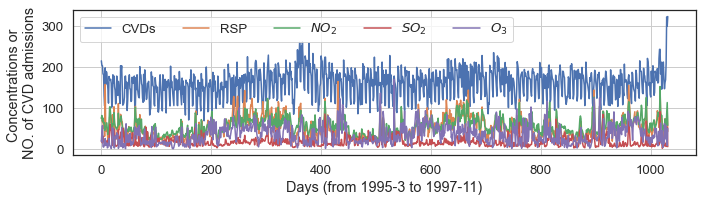

In [8]:
tlabels = ['CVDs', 'RSP', '$NO_2$', '$SO_2$', '$O_3$']

fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(data, label=tlabels)
ax.set_xlabel('Days (from 1995-3 to 1997-11)')
ax.set_ylabel('Concentrations or \nNO. of CVD admissions')
ax.legend(ncol=5)
ax.grid()
plt.tight_layout()

In [5]:
def main():
    embed_dim = 20
    n_neighbor = 3
    n_excluded = 5
    GC = cmp.GrangerCausality(embed_dim=embed_dim)
    TE = cmp.TransferEntropy(embed_dim=embed_dim)
    CCM = cmp.ConvergeCrossMapping(embed_dim=embed_dim, n_neighbor=n_neighbor, n_excluded=n_excluded)
    PCM = cmp.PartialCrossMapping(embed_dim=embed_dim, n_neighbor=n_neighbor, n_excluded=n_excluded)
    CMC = cmp.CrossMappingCardinality(embed_dim=embed_dim, n_neighbor=n_neighbor, n_excluded=n_excluded)
    DCMC = cmp.DirectCrossMappingCardinality(embed_dim=embed_dim, n_neighbor=n_neighbor, n_excluded=n_excluded)
    
    methods = [GC, TE, CCM, PCM, CMC, DCMC]
    labels = ['GC', 'TE', 'CCM', 'PCM', 'CMC', 'DCMC']
    
    data = np.load(f'../data/airpollution/air_HK.npy')
    res_dir = f'results/airpollution/'
    for i, method in enumerate(methods):
        method.fit(data)
        np.save(f'{res_dir}method{labels[i]}.npy', method.scores)
        print(f'method {labels[i]} complete!')

In [6]:
main()

method GC complete!
method TE complete!
method CCM complete!
method PCM complete!
method CMC complete!
method DCMC complete!


In [13]:
methods = ['GC', 'TE', 'CCM', 'PCM', 'CMC', 'DCMC']

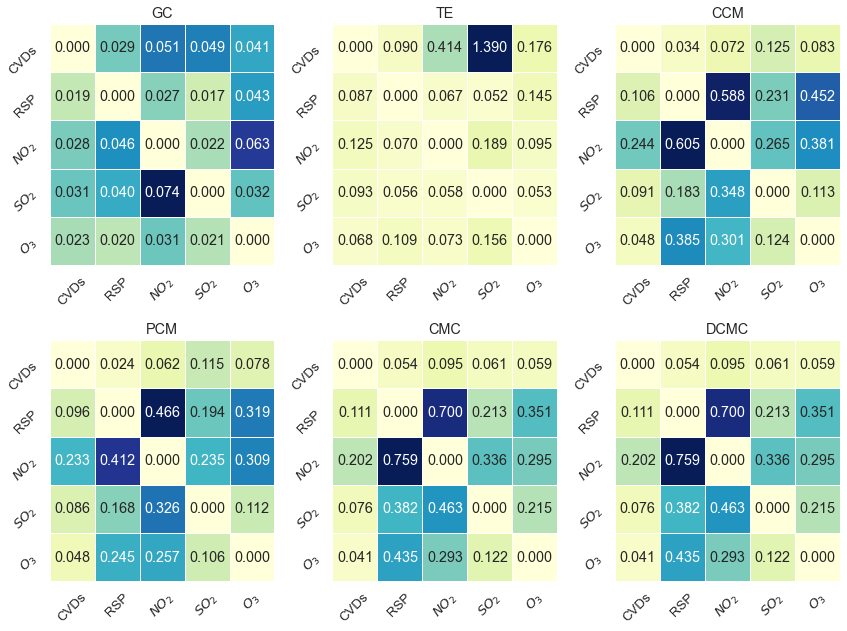

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(12, 9))
ax = ax.flatten()
for i, method in enumerate(methods):
    mat = np.load(f'{res_dir}method{method}.npy')
    ax[i] = cmp.plot_score_matrix(mat, cbar=False, labels=tlabels, ticklabel_rotation=45, annot=True, ax=ax[i])
    ax[i].set_title(method)

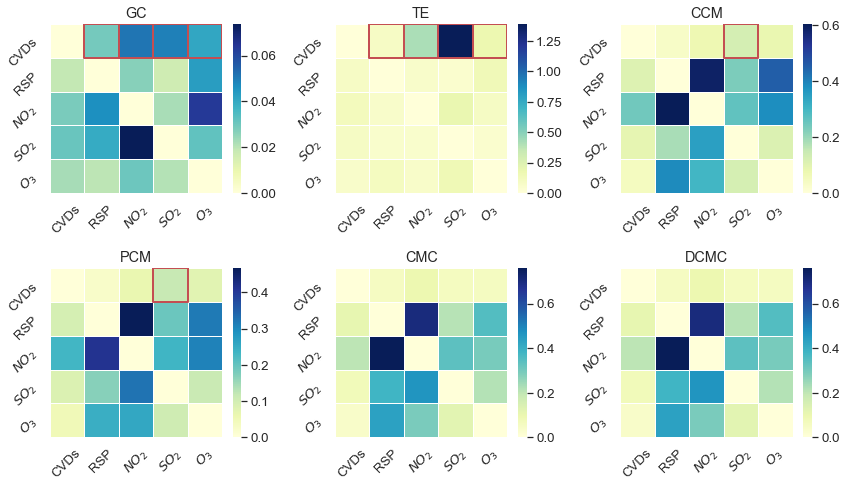

In [19]:
false_pos = [[[0, 0, 0, 0], [1, 2, 3, 4]], # GC: 0.018
             [[0, 0, 0, 0], [1, 2, 3, 4]], # TE: 0.087
             [[0], [3]], # CCM： 0.106
             [[0], [3]], # PCM: 0.096
             [], # CMC: 0.111
             []] # DCMC: 0.111

fig, ax = plt.subplots(2, 3, figsize=(12, 7))
ax = ax.flatten()
for i, method in enumerate(methods):
    mat = np.load(f'{res_dir}method{method}.npy')
    ax[i] = cmp.plot_score_matrix(mat, cbar=True, labels=tlabels, ticklabel_rotation=45, annot=False, ax=ax[i])
    ax[i].set_title(method)
    if len(false_pos[i]) != 0:
        cmp.plot_annot_square(false_pos[i], ax=ax[i], c='r', lw=2)